In [3]:
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
import pandas as pd

In [8]:
X=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [9]:
X.head() #ilk beş satır yazılır

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y=pd.DataFrame(data=iris.target,columns =["irisType"])
#hedef değişkenini oluşturdum
#çıktı değişkeni irisin türlerini gösteriyor 0-1-2

In [11]:
y.head()

,irisType
0,0
1,0
2,0
3,0
4,0


In [12]:
y.irisType.value_counts() 
#hepsinden kaçar tane oldupunu hesapladım

0    50
1    50
2    50
Name: irisType, dtype: int64

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
import seaborn as sns

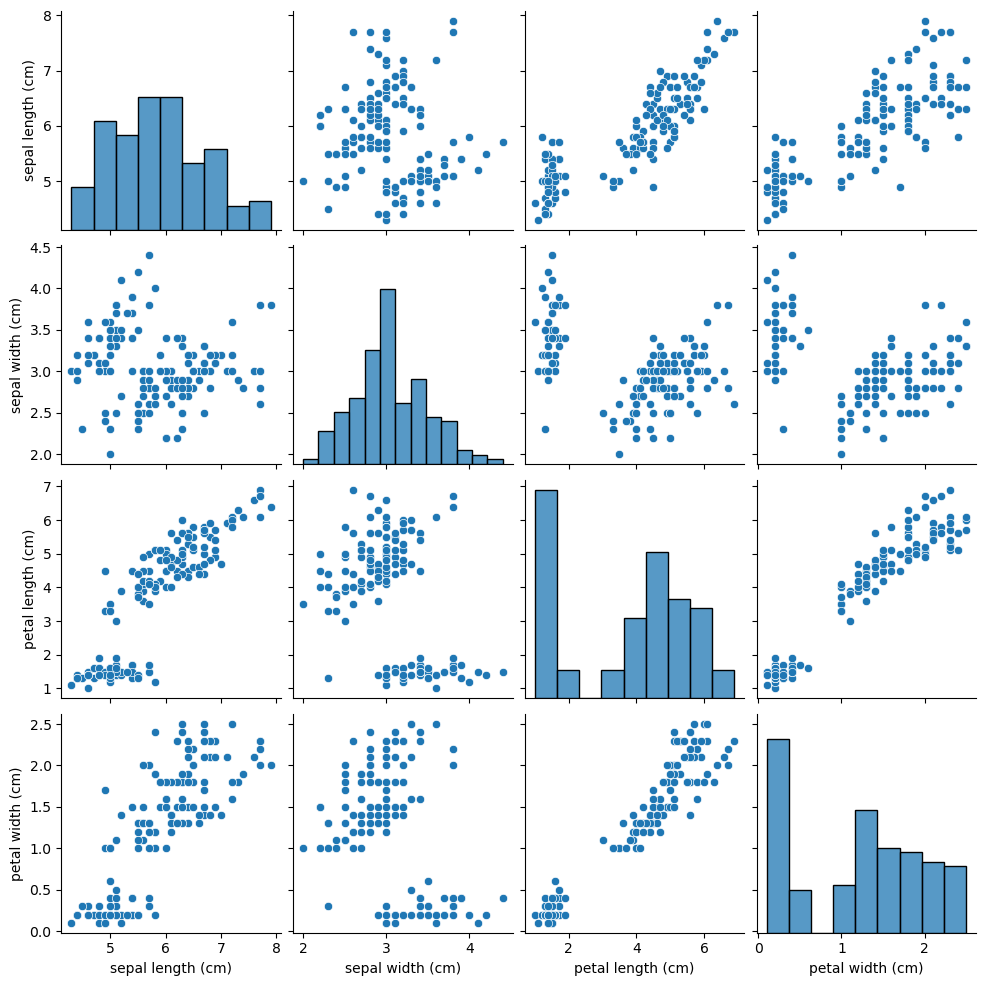

In [17]:
sns.pairplot(X)
#ana köşegende histogram grafiklerini çizdirdim

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [23]:
X_train.shape 
#eğitim veri setinde 135 tane örneklem 4 tane de attribute bulunuyor

(135, 4)

In [24]:
print(y_train.shape)
print(y_test.shape)
#burada örneklerin 135 tanesi train 15 tanesi test için kullanılı

(135, 1)
(15, 1)


In [25]:
#veride yükske miktarda varyans varsa veri normalleştirilir
#verideki varyansı kontrol edeceğim
#varyanslar düşük normalleştirmeye gerek yok
X_train.var(),X_test.var()

(sepal length (cm)    0.694776
 sepal width (cm)     0.191114
 petal length (cm)    3.107892
 petal width (cm)     0.578925
 dtype: float64,
 sepal length (cm)    0.638095
 sepal width (cm)     0.192667
 petal length (cm)    3.318095
 petal width (cm)     0.623524
 dtype: float64)

In [26]:
import tensorflow as tf
#verilerin one hot kodlamasını yapıyoruz
#temel olarak bir veri ön işleme yaptık

In [27]:
y_train=tf.keras.utils.to_categorical(y_train)

In [29]:
y_test=tf.keras.utils.to_categorical(y_test)

In [30]:
y_train[:5,:]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [31]:
X_train=X_train.values
X_test=X_test.values
#values methodu ile girdileri numpy array yapısına çeviridik

In [32]:
X_train[0]

array([6.3, 3.3, 4.7, 1.6])

In [33]:
from tensorflow.keras.models import Sequential
#keras ile veriyi modelliyoruz

In [34]:
from tensorflow.keras.layers import Dense

In [40]:
#sinir ağlarına laeyrlar ekliyorum
#64 nöran sayısı
#input_shape=X_train[0].shape (girdi eğitim veri sayısını çıktı sayısı olarak alabilriz)
#softmax dememizin sebebi genelde çıkış fonksyonlarında kullanılması (3 ise benim türümd)

model=Sequential()
model.add(Dense(64,activation="relu",input_shape=X_train[0].shape))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(3,activation="softmax"))

In [43]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["acc"])

In [44]:
#batch_Size=model eğitilirken kaçar örnek alınacağını belirler
#epochs=modelin kaç defa eğitim verisini göreceğini ifade eder
#validation=modelin eğitimini iyileştirmek için kullanılır
#history değişkeni =eğitim geçmişini gösteren bir call back hesaplatır
history=model.fit(X_train,y_train,batch_size=32,epochs=7,validation_split=0.1)
#sonuçları değerlendirirsek val_Acc değeri daha büyük olduğu için modelde bir underfitting problemi var

Epoch 1/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - acc: 0.3017 - loss: 1.1002 - val_acc: 0.6429 - val_loss: 0.9217
Epoch 2/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6732 - loss: 0.8961 - val_acc: 0.6429 - val_loss: 0.7933
Epoch 3/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.6961 - loss: 0.7529 - val_acc: 0.6429 - val_loss: 0.7007
Epoch 4/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.7166 - loss: 0.6484 - val_acc: 0.9286 - val_loss: 0.6316
Epoch 5/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.8193 - loss: 0.5667 - val_acc: 0.8571 - val_loss: 0.5576
Epoch 6/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.8071 - loss: 0.4846 - val_acc: 0.9286 - val_loss: 0.4983
Epoch 7/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8895 - loss: 0.4352 - val_acc: 0.9286 - val_loss: 0.4562


In [46]:
import matplotlib.pyplot as plt

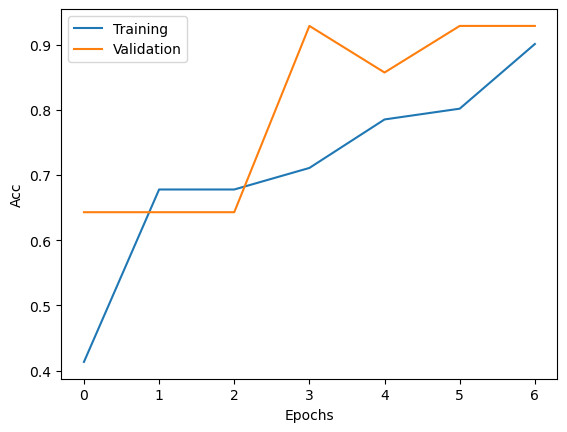

In [47]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend(["Training","Validation"])

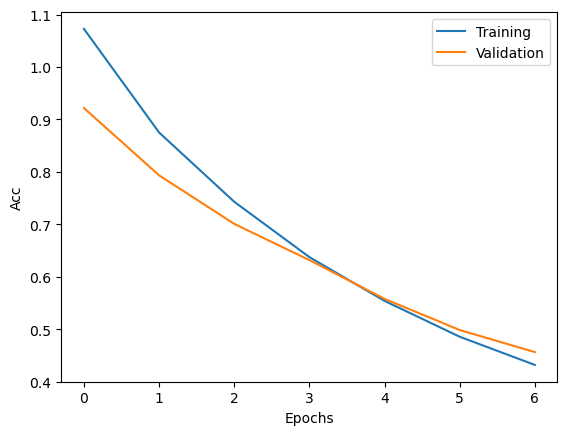

In [48]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend(["Training","Validation"])

In [49]:
model.evaluate(X_test,y_test)
#veri boyutlarında hata alıyorum

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 15
'y' sizes: 135
